In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./SatList.csv')

In [3]:
myDict = df.to_dict()

In [4]:
freqs = list(myDict['Frequency [MHz]'].values())
names = list(myDict['Name'].values())
IDs = list(myDict['ID'].values())
orbits = list(myDict['Orbit'].values())
status = list(myDict['Status'].values())
bw = list(myDict['Bandwidth [kHz]/Baud'].values())
source = list(myDict['Source'].values())

In [5]:
def isfloat(string):
    try:
        float(string)
    except ValueError:
        return False
    if(str(float(string)) == str(float('nan'))):
        return False
    return True

# Number of Entries:

In [6]:
# Number of entries
entNum = len(freqs)
print(entNum)

22138


# Number of Satellites:

In [7]:
# Number of satellites (approx)
distName = []
distID = []
index = 0
for indName in names:
    if ((IDs[index] not in distID) and (indName.lower() not in distName)):
        distName += [indName.lower()]
        if (str(IDs[index]).isnumeric()):
            distID += [IDs[index]]
    index += 1

satNum = len(distName)

In [8]:
print(len(distName))

12963


# Histograms:

In [9]:
# Histograms
newFreq = []
newStat = []
index = -1

for each in freqs:
    index += 1
    try:
        newFreq += [float(each)]
        newStat += [status[index]]
    except:
        pass

In [10]:
actFreqs = []
for i in range(len(newStat)):
    if (newStat[i].lower() == 'active'):
        actFreqs += [newFreq[i]]

Text(0.5, 1.0, 'Satellite Downlink Distribution (0 - 40 GHz)')

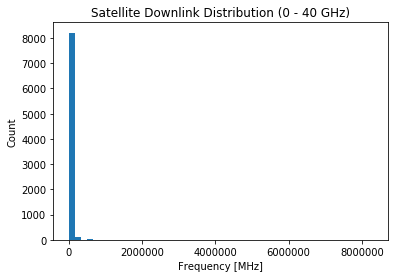

In [11]:
plt.hist(newFreq, bins=50)

plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")
plt.title("Satellite Downlink Distribution (0 - 40 GHz)")

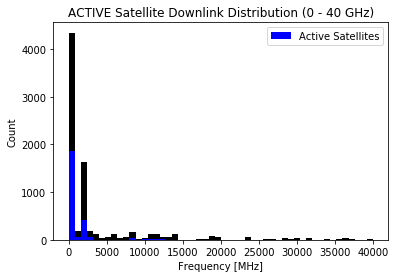

In [12]:
plt.hist(newFreq, bins=50, range=(0, 40000), color='black')
plt.hist(actFreqs, bins=50, range=(0, 40000), color='blue', label="Active Satellites")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")
plt.title("ACTIVE Satellite Downlink Distribution (0 - 40 GHz)")
plt.legend()

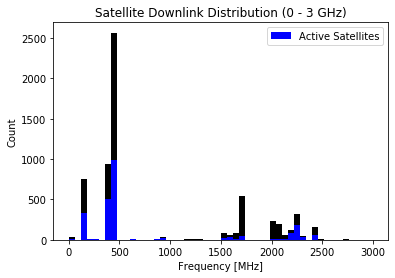

In [13]:
plt.hist(newFreq, bins=50, range=(0, 3000), color='black')
plt.hist(actFreqs, bins=50, range=(0, 3000), color='blue', label="Active Satellites")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")
plt.title("Satellite Downlink Distribution (0 - 3 GHz)")
plt.legend()

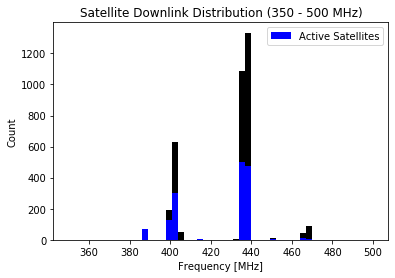

In [14]:

plt.hist(newFreq, bins=50, range=(350, 500), color='black')
plt.hist(actFreqs, bins=50, range=(350, 500), color='blue', label="Active Satellites")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")
plt.title("Satellite Downlink Distribution (350 - 500 MHz)")
plt.legend()

# Quick Stats:

In [15]:
#Percent complete
incomp = []
for i in range(len(names)):
    for each in myDict:
        if(myDict[each][i] == 'None'):
            incomp += [i]
incomp = set(incomp)
compCount = entNum - len(incomp)
percComp = compCount/entNum
print("Percent of entries fully complete: ", percComp)

Percent of entries fully complete:  0.03726623904598428


In [16]:
#Percent w ID
compID = len([x for x in IDs if (isfloat(str(x)))])
percID = compID/entNum
print("Percent of entries w/ ID: ", percID)

Percent of entries w/ ID:  0.8714879392899088


In [17]:
#Percent w Status
compStat = len([x for x in status if ((x != 'None'))])
percStat = compStat/entNum
print("Percent of entries w/ Status: ", percStat)

Percent of entries w/ Status:  0.5850121962236878


In [18]:
#Percent w Frequency
compfreq = len([x for x in freqs if ((x != 'None'))])
percfreq = compfreq/entNum
print("Percent of entries w/ Downlink Frequency: ", percfreq)

Percent of entries w/ Downlink Frequency:  0.37717951034420455


In [19]:
#Percent w BW
compBW = len([x for x in bw if ((x != 'None'))])
percBW = compBW/entNum
print("Percent of entries w/ BW/Baud: ", percBW)

Percent of entries w/ BW/Baud:  0.22861143734754721


In [20]:
#Percent w Orbit
compOrbit = len([x for x in orbits if ((x != 'None'))])
percOrbit = compOrbit/entNum
print("Percent of entries w/ Orbit Class: ", percOrbit)

Percent of entries w/ Orbit Class:  0.7442858433462824


In [21]:
# Percent Active Satellites in Entries w Status
compAct = len([x for x in status if ((x.lower() == 'active'))])
compInact = len([x for x in status if ((x.lower() == 'inactive'))])
percAct = compAct/compStat
percInact = compInact/compStat
print("Percent of active satellites: ", percAct)
print("Percent of inactive satellites: ", percInact)

Percent of active satellites:  0.7845726198749131
Percent of inactive satellites:  0.1511080225465215


In [22]:
descs = list(myDict['Description'].values())
for each in descs:
    if (str(each) == str(float('nan'))):
        print(each)

# Frequency Allocation Pi Chart:

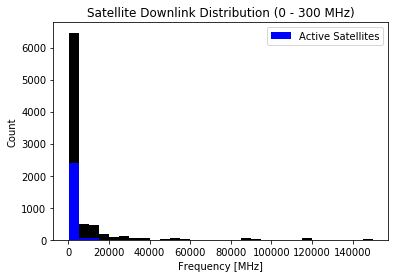

In [23]:
# Set up appropriate bins
# More histograms:

plt.hist(newFreq, bins=30, range=(100, 150000), color='black')
plt.hist(actFreqs, bins=30, range=(100, 150000), color='blue', label="Active Satellites")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Count")
plt.title("Satellite Downlink Distribution (0 - 300 MHz)")
plt.legend()

In [24]:
zeroToFiveHund = len([x for x in newFreq if (float(x) < 500)])
zeroToThreeHund = len([x for x in newFreq if (float(x) < 400)])
threeHundToFive = len([x for x in newFreq if ((float(x) < 500) and (float(x) >= 400))])
FiveHundToTwoThous = len([x for x in newFreq if ((float(x) < 2000) and (float(x) >= 500))])
TwoThousAbove = len([x for x in newFreq if (float(x) >= 2000)])
#NoneFreq = len([x for x in newFreq if ('None' in x)])

Text(0.5, 1.0, 'Downlink Frequency Entries')

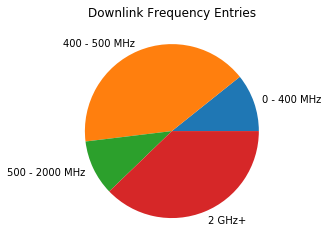

In [25]:
mylabels = ["0 - 400 MHz", "400 - 500 MHz", "500 - 2000 MHz", "2 GHz+"]
plt.pie([zeroToThreeHund,threeHundToFive, FiveHundToTwoThous, TwoThousAbove], labels=mylabels)
plt.title("Downlink Frequency Entries")
#plt.savefig("FrequencyPie.png")

# Sources Pie Chart

In [26]:
UCSsrc = len([x for x in source if ('UCS' in x)])
CTsrc = len([x for x in source if ('CelesTrak' in x)])
STsrc = len([x for x in source if ('Space-Track' in x)])
FCCsrc = len([x for x in source if ('FCC' in x)])
ASsrc = len([x for x in source if ('AmSAT' in x)])
SNsrc = len([x for x in source if ('SatNOGS' in x)])
RGsrc = len([x for x in source if ('USRadioGuy' in x)])
OSsrc = len([x for x in source if ('Oscar' in x)])

Text(0.5, 1.0, 'Entry Sources')

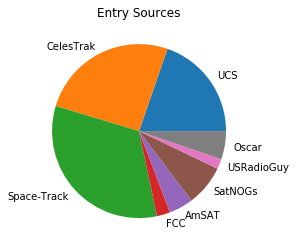

In [27]:
mylabels = ["UCS", "CelesTrak", "Space-Track", "FCC", "AmSAT", "SatNOGs", "USRadioGuy", "Oscar"]
plt.pie([UCSsrc, CTsrc, STsrc, FCCsrc, ASsrc, SNsrc, RGsrc, OSsrc], labels=mylabels)
plt.title("Entry Sources")
#plt.savefig("SourcePie.png")

In [28]:
LEOnm = len([x for x in orbits if ('LEO' in x)])
GEOnm = len([x for x in orbits if ('GEO' in x)])
MEOnm = len([x for x in orbits if ('MEO' in x)])
Nonenm = len([x for x in orbits if ('None' in x)])

Text(0.5, 1.0, 'Entry Orbits')

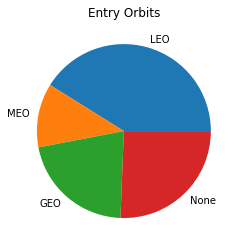

In [29]:
mylabels = ["LEO", "MEO", "GEO", "None"]
#mylabels = ["LEO", "MEO", "GEO"]
plt.pie([LEOnm, GEOnm, MEOnm, Nonenm], labels=mylabels)
plt.title("Entry Orbits")
#plt.savefig("SourcePie.png")

Text(0.5, 1.0, 'Active vs Inactive Satellites')

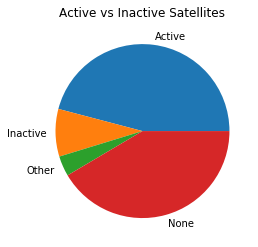

In [30]:
# Active/Inactive/Other/None pie chart
compNone = len([x for x in status if ((x.lower() == 'none'))])
compOther = entNum - compAct - compInact - compNone
#mylabels = ["LEO", "MEO", "GEO", "None"]
mylabels = ["Active", "Inactive", "Other", "None"]
plt.pie([compAct, compInact, compOther, compNone], labels=mylabels)
plt.title("Active vs Inactive Satellites")
#plt.savefig("SourcePie.png")

In [31]:
compID, compName, compFreq, compBW, compStat, compDesc, compSource, compOrb = [], [], [], [], [], [], [], []
compDict = {'ID':[], 'Name':[], 'Frequency [MHz]':[], 'Bandwidth [kHz]/Baud':[], 'Status':[], 'Description':[], 'Source':[], 'Orbit':[]}

for ind in range(len(freqs)):
    for key in myDict:
        if (key != 'Unnamed: 0'):
            if (str(myDict[key][ind]) == 'None'):
                compDict[key] += [0]
            else:
                compDict[key] += [1]


In [32]:
compArray = np.array(list(compDict.values())).T

([<matplotlib.axis.XTick at 0x12108d5d0>,
 <a list of 8 Text xticklabel objects>)

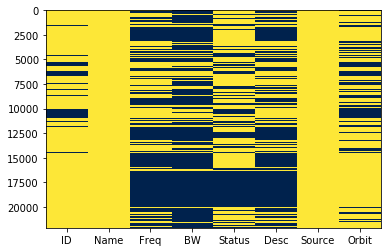

In [33]:
# Completion Matrix
plt.imshow(compArray, aspect='auto', cmap='cividis')
plt.xticks(np.arange(0, 8, 1), labels=['ID', 'Name', 'Freq', 'BW', 'Status', 'Desc', 'Source', 'Orbit'])

In [111]:
for each in names:
    if (('(' in each) and (')' in each)):
        print(each)

-----  (Phase-3A)
-----  (Phase-3A)
3B5GSAT (SATELIOT 1)
3CAT-5/A (TYVAK-0161)
3CAT-5/B (TYVAK-0162)
A-1 (ASTERIX)
ABS 1A (KOREASAT 2)
ABS 3 (AGILA 2)
ABS 4 (MBSAT)
ABS 6 (LMI 1)
ABS 7 (KOREASAT 3)
ABS-2A (MONGOLSAT-1)
ABS-4 (MOBISAT-1)
AEHF 1 (USA 214)
AEHF 2 (USA 235)
AEHF 3 (USA 246)
AEHF 4 (USA 288)
AEHF 5 (USA 292)
AEHF 6 (USA 298)
AEHF-1 (USA 214)
AEHF-2 (USA 235)
AEHF-3 (USA 246)
AEHF-4 (USA 288)
AEHF-5 (USA 292)
AEHF-6 (USA 298)
AFOTEC-1 (FALCON ODE)
AFRICASAT 1 (MEASAT 1)
AGILA 1 (PALAPA B2P)
AIST-1 (RS-41)
AIST-2 (RS-43)
AIST-2 (RS-43)
AIST-2D (RS-48)
AIST-2D (RS-48)
AJISAI (EGS)
AKATSUKI (PLANET-C)
AL-AMAL (HOPE)
ALEXANDER (PhoneSat2)
ALEXANDER (PhoneSat2)
ALOUETTE 1 (S-27)
ALPHASAT (I-4A F4)
AMC-1 (GE-1)
AMC-10 (GE-10)
AMC-11 (GE-11)
AMC-2 (GE-2)
AMC-3 (GE-3)
AMC-4 (GE-4)
AMC-5 (GE-5)
AMC-6 (GE-6)
AMC-7 (GE-7)
AMC-8 (GE-8)
AMC-9 (GE-12)
AMGU-1 (AMURSAT)
AMOS 5I (ASIASAT 2)
ANDE-2 (Castor)
ANDE-2 (Pollux)
ANIK A1 (TELESAT 1)
ANIK A2 (TELESAT 2)
ANIK A3 (TELESAT-3)
ANIK B1 (T

SAUDISAT 1C (SO-50)
SBIRS GEO 1 (USA 230)
SBIRS GEO 2 (USA 241)
SBIRS GEO 3 (USA 282)
SBIRS GEO 4 (USA 273)
SBIRS GEO 5 (USA 315)
SBIRS GEO 6 (USA 336)
SBIRS GEO-1 (USA 230)
SBIRS GEO-2 (USA 241)
SBIRS GEO-3 (USA 282)
SBIRS GEO-4 (USA 273)
SBIRS GEO-5 (USA 315)
SBIRS GEO-6 (USA 336)
SBSS (USA 216)
SECOR 13 (EGRS 13)
SECOR 4 (EGRS 4)
SECOR 5 (EGRS 5)
SECOR 7 (EGRS 7)
SECOR 8 (EGRS 8)
SECOR 9 (EGRS 9)
SEEDS II (CO-66)
SES 7 (PROTOSTAR 2)
SES-11 (ECHOSTAR 105)
SES-7 (PROTOSTAR 2)
SESAT 2 (EXPRESS AM-22)
SHENZHOU-16 (SZ-16)
SHIJIAN 6 01A (SJ-6 01A)
SHIJIAN 6 01B (SJ-6 01B)
SHIJIAN 6 02A (SJ-6 02A)
SHIJIAN 6 02B (SJ-6 02B)
SHIJIAN 6 03A (SJ-6 03A)
SHIJIAN 6 03B (SJ-6 03B)
SHIJIAN 6 04A (SJ-6 04A)
SHIJIAN 6 04B (SJ-6 04B)
SHIJIAN 6 05A (SJ-6 05A)
SHIJIAN 6 05B (SJ-6 05B)
SHIJIAN-15 (SJ-15)
SHIJIAN-16 (SJ-16)
SHIJIAN-17 (SJ-17)
SHIJIAN-20 (SJ-20)
SHIJIAN-21 (SJ-21)
SHIJIAN-23 (SJ-23)
SHIJIAN-6 01A (SJ-6 01A)
SHIJIAN-6 01B (SJ-6 01B)
SHIJIAN-6 02A (SJ-6 02A)
SHIJIAN-6 02B (SJ-6 02B)
SHIJIAN-6 

In [113]:
for each in names:
    if (',' in each):
        print(each)

 CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4
3CAT-5/A, FSSCat A
3CAT-5/B, FSSCat B
WORLDVIEW-1, -2, and -3 and
WORLDVIEW-LEGION-1 through -12
WORLDVIEW-1, -2, and -3 and
WORLDVIEW-LEGION-1 through -12


In [115]:
IDs

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 '57312',
 '57313',
 '57314',
 '57315',
 '57317',
 '44859',
 '43466',
 '43466',
 '43466',
 '43466',
 '40899',
 '44316',
 '44842',
 '44884',
 '49322',
 '49322',
 '49322',
 '51824',
 '51825',
 '51827',
 '51828',
 '51829',
 '51830',
 '51832',
 '51833',
 '51836',
 '51837',
 '51842',
 '51843',
 '51845',
 '51946',
 '51947',
 '51948',
 '51949',
 '51950',
 '51951',
 '51952',
 '52085',
 '52085',
 '52153',
 '52155',
 '52156',
 '52420',
 '52716',
 '52717',
 '52718',
 '53299',
 '53300',
 '53301',
 '53302',
 '53303',
 '53346',
 '53347',
 '53348',
 '53367',
 '53368',
 '53369',
 '53371',
 '53372',
 '53379',
 '53380',
 '53446',
 '53884',
 '53885',
 '53948',
 '53949',
 '53950',
 '54362',
 '54588',
 '54682',
 '54683',
 '54687',
 '54688',
 '54693',
 '55133',
 '55134',
 '55135',
 '55136',
 '55137',
 '55248',
 '55249',
 '55250',
 '55251',
 '55252',
 '55253',
 '55254',
 '55255',
 '55256',
 '55257',
 '

In [116]:
clones = []
index = 0
for each in names:
    eachInd = index + 1
    for rest in names[eachInd:]:
        if ((rest.lower() == each.lower()) or (rest.lower() in each.lower()) or (each.lower() in rest.lower())):
            print(each, rest)

        eachInd += 1
    index += 1


 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-2
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-3
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAPELLA-3, and CAPELLA-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-2
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-3
 CAPELLA-2, CAPELLA-3, and CAPELLA-4 Capella-4
 CAPELLA-2, CAPELLA-3, and CAPELLA-4  CAPELLA-2, CAP

AEHF 1 (USA 214) USA 21
AEHF 2 (USA 235) USA 23
AEHF 3 (USA 246) USA 24
AEHF 4 (USA 288) USA 28
AEHF-1 (USA 214) F-1
AEHF-1 (USA 214) F-1
AEHF-1 (USA 214) USA 21
AEHF-2 (USA 235) USA 23
AEHF-3 AEHF-3 (USA 246)
AEHF-3 (USA 246) USA 24
AEHF-4 AEHF-4 (USA 288)
AEHF-4 (USA 288) USA 28
AEHF-5 AEHF-5 (USA 292)
AEHF-6 AEHF-6 (USA 298)
AENEAS AENEAS
AEROCUBE 7 Aerocube 7A
AFOTEC-1 AFOTEC-1 (FALCON ODE)
AFR-1 AFR-1
AFR-1 AFR-1
AFR-1 AFR-1
AFRISTAR AFRISTAR-2
AHMAT-1 AHMAT-1
AHMAT-1 AHMAT-1
AHMAT-1 AHMAT-1
AHMAT-1 AHMAT-1
AHMAT-1 AHMAT-1
AHMAT-1 AHMAT-1
AII-BRAVO AII-BRAVO
AII-DELTA AII-DELTA
AIM ESSAIM-1
AIM ESSAIM-2
AIM ESSAIM-3
AIM ESSAIM-4
AIM EXPLORER 33 (AIMP-D)
AIM EXPLORER 35 (AIMP-E)
AIM LEMUR 2 DISCLAIMER
AIM LEMUR-2-DISCLAIMER
AISAT AISAT
AISAT AISAT
AISAT AISAT-1
AISAT AISAT-1
AISAT AISAT-1
AISAT AISAT-1
AISAT AISAT-1
AISAT AISat
AISAT AISat
AISAT DUBAISAT 1
AISAT DUBAISAT 2
AISAT DUBAISAT-1
AISAT DubaiSat-2
AISAT FAISAT
AISAT FAISAT 2V
AISAT JAISAT 1
AISAT JAISAT-1
AISAT JAISAT-1
AI

AMAZONAS AMAZONAS 2
AMAZONAS AMAZONAS 3
AMAZONAS AMAZONAS 4A
AMAZONAS AMAZONAS 5
AMAZONAS AMAZONAS NEXUS
AMAZONAS AMAZONAS NEXUS
AMAZONAS AMAZONAS NEXUS
AMAZONAS AMAZONAS NEXUS
AMAZONAS AMAZONAS NEXUS
AMAZONAS AMAZONAS-2
AMAZONAS AMAZONAS-2
AMAZONAS AMAZONAS-2
AMAZONAS AMAZONAS-2
AMAZONAS AMAZONAS-2
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS AMAZONAS-3
AMAZONAS Amazonas-4A
AMAZONAS Amazonas-5
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS AMAZONAS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS NEXUS
AMAZONAS NEXUS 

APOLLO 16 LM (ORION) ION
APSS-1 APSS-1
APSS-1 SS-1
APSS-1 SS-1
APSS-1 SS-1
APSS-1 SS-1
APSTAR 1 APSTAR 1A
APSTAR 2R (TELSTAR 10) TELSTAR 1
APSTAR 5 APSTAR 5
APSTAR 5 APSTAR 5
APSTAR 5 APSTAR 5 (TELSTAR 18)
APSTAR 5 TELSTAR 18V (APSTAR 5C)
APSTAR 5 APSTAR 5
APSTAR 5 APSTAR 5 (TELSTAR 18)
APSTAR 5 TELSTAR 18V (APSTAR 5C)
APSTAR 5 APSTAR 5 (TELSTAR 18)
APSTAR 5 TELSTAR 18V (APSTAR 5C)
APSTAR 5 (TELSTAR 18) TELSTAR 1
APSTAR 6 APSTAR 6
APSTAR 6 APSTAR 6E
APSTAR 6 APSTAR 6E SPS
APSTAR 6 Apstar 6C
APSTAR 6 Apstar 6D
APSTAR 6 APSTAR 6E
APSTAR 6 APSTAR 6E SPS
APSTAR 6 Apstar 6C
APSTAR 6 Apstar 6D
APSTAR 6E APSTAR 6E SPS
AQUA EOS-PM Aqua
AQUA SAC-D (AQUARIUS)
ARASE (ERG) ERG
ARC-1 ARC-1
ARC-1 SPARC-1
ARC-1 SPARC-1
ARCADE ARCADE (INSPIRESat-4)
ARCADE (INSPIRESat-4) RE
ARCE-1A ARCE-1A
ARCE-1A ARCE-1A
ARCE-1A ARCE-1A
ARCE-1B ARCE-1B
ARCE-1B ARCE-1B
ARCE-1B ARCE-1B
ARCE-1C ARCE-1C
ARCE-1C ARCE-1C
ARCE-1C ARCE-1C
ARCSAT ARCSAT
ARCSAT ARCSAT
ARCSAT ARCSAT
ARCSAT ARCSAT
ARCSAT ARCSAT
ARCSAT ARCSAT
ARCS

ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) SSA
ARISSat-1 (SuitSat-2) ARISSat-1 (SuitSat-2)
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2) ISS
ARISSat-1 (SuitSat-2

AprizeSat-6 AprizeSat-6
AprizeSat-6 AprizeSat-6
AprizeSat-6 AprizeSat-6
ArSat 2 INMARSAT 2-F1
ArSat 2 INMARSAT 2-F2
ArSat 2 INMARSAT 2-F3
ArSat 2 INMARSAT 2-F4
ArSat 2 RADARSAT 2
ArcCube-01 ArcCube-01
ArcCube-01 ArcCube-01
ArcCube-01 ArcCube-01
ArcCube-01 ArcCube-01
ArcCube-01 ArcCube-01
ArcCube-01 ArcCube-01
ArduSat-1 ArduSat-1
ArduSat-X ArduSat-X
Argus Argus
Argus Argus-2
Argus Argus-2 (MVP-Argus)
Argus Argus-2
Argus Argus-2 (MVP-Argus)
Argus-2 Argus-2 (MVP-Argus)
AstroBio AstroBio
Astrocast 0.1 Astrocast 0.1
Astrocast 0.1 Astrocast 0.1
Astrocast 0.1 Astrocast 0.1
Astrocast 0.1 Astrocast 0.1
Astrocast 0.1 Astrocast 0.1
Astrocast 0.1 Astrocast 0.1
Astrocast 0.2 Astrocast 0.2
Astrocast 0.2 Astrocast 0.2
Astrocast 0.2 Astrocast 0.2
Astrocast-0.1 Astrocast-0.1
Astrocast-0.2 Astrocast-0.2
Astrocast-0304 Astrocast-0304
Athena Athena-Fidus
Athenoxat-1 Athenoxat-1
Aurora Aurora
Aurora AuroraSat
Aurora AuroraSat
Aurora DEMO9 (AURORA)
Aurora DEMO9(AURORA)
Aurora INTERBALL AURORA
Aurora TABLETS

BEIDOU 3M13 Beidou 3M1
BEIDOU 3M14 Beidou 3M1
BEIDOU 3M15 Beidou 3M1
BEIDOU 3M16 Beidou 3M1
BEIDOU 3M17 Beidou 3M1
BEIDOU 3M18 Beidou 3M1
BEIDOU 3M19 Beidou 3M1
BEIDOU 3M2 BEIDOU 3M20
BEIDOU 3M2 BEIDOU 3M21
BEIDOU 3M2 BEIDOU 3M22
BEIDOU 3M2 BEIDOU 3M23
BEIDOU 3M2 BEIDOU 3M24
BEIDOU IGSO-6 IGS
BEIDOU IGSO-7 IGS
BEIDOU-2 IGSO-1 IGS
BEIDOU-2 IGSO-2 IGS
BEIDOU-2 IGSO-3 IGS
BEIDOU-2 IGSO-4 IGS
BEIDOU-2 IGSO-5 IGS
BEIDOU-2 IGSO-6 IGS
BEIDOU-2 IGSO-7 IGS
BEIDOU-3 IGSO-1 IGS
BEIDOU-3 IGSO-2 IGS
BEIDOU-3 IGSO-3 IGS
BEIDOU-3 M1 BEIDOU-3 M10
BEIDOU-3 M1 BEIDOU-3 M11
BEIDOU-3 M1 BEIDOU-3 M12
BEIDOU-3 M1 BEIDOU-3 M13
BEIDOU-3 M1 BEIDOU-3 M14
BEIDOU-3 M1 BEIDOU-3 M15
BEIDOU-3 M1 BEIDOU-3 M16
BEIDOU-3 M1 BEIDOU-3 M17
BEIDOU-3 M1 BEIDOU-3 M18
BEIDOU-3 M1 BEIDOU-3 M19
BEIDOU-3 M2 BEIDOU-3 M20
BEIDOU-3 M2 BEIDOU-3 M21
BEIDOU-3 M2 BEIDOU-3 M22
BEIDOU-3 M2 BEIDOU-3 M23
BEIDOU-3 M2 BEIDOU-3 M24
BEIDOU-3S IGSO-1S IGS
BEIDOU-3S IGSO-2S IGS
BEIJING 1 BEIJING 1 (TSINGHUA)
BEIJING-3B Beijing-3
BELL (PhoneSat1) 

BRITE-U UNIBRITE UNIBRITE
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 3 BRO 3
BRO 4 BRO 4
BRO 4 BRO 4
BRO 4 BRO 4
BRO-5 BRO-5
BRO-5 BRO-5
BRO-5 BRO-5
BRO-6 BRO-6
BRO-6 BRO-6
BRO-6 BRO-6
BRO-7 BRO-7
BRO-7 BRO-7
BRO-7 BRO-7
BRO-8 BRO-8
BRO-8 BRO-8
BRO-8 BRO-8
BRO-9 BRO-9
BRO-9 BRO-9
BRO-9 BRO-9
BRO-9 BRO-9
BRO-9 BRO-9
BRO-9 BRO-9
BSAT-3C BSAT-3C (JCSAT-110R)
BSAT-3C BSAT-3C/JCSat 110-R
BSAT-3C/JCSat 110-R JCSAT 1
BUGSAT 1 GSAT 1
BUGSAT-1 BUGSAT-1
BUGSAT-1 BUGSAT-1
BUGSAT-1 BUGSAT-1 (TITA)
BUGSAT-1 BugSat-1
BUGSAT-1 BUGSAT-1
BUGSAT-1 BUGSAT-1 (TITA)
BUGSAT-1 BugSat-1
BUGSAT-1 BUGSAT-1 (TITA)
BUGSAT-1 BugSat-1
BUGSAT-1 (TITA) BugSat-1
BY70-1 BY70-1
BY70-1 BY70-1
BY70-1 BY70-1
BY70-2 BY70-2
BY70-3 BY70-3
BY70-3 BY70-3
BY70-3 BY70-3
Badr 5 Badr 5A
BeaverCube BeaverCube
BeaverCube BeaverCube
BeaverCube BeaverCube
BeaverCube BeaverCube
BeaverCube BeaverCube
BeaverCube BeaverCube
Beidou IGSO-1 IGS
Beidou IGSO-2 IGS
Beidou IGSO-

CAS-3D (XW-2D) XW-2D
CAS-3D (XW-2D) XW-2D
CAS-3D (XW-2D) XW-2D
CAS-3D (XW-2D) XW-2D
CAS-3E (XW-2E) CAS-3E (XW-2E)
CAS-3E (XW-2E) CAS-3E (XW-2E)
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) CAS-3E (XW-2E)
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3E (XW-2E) XW-2E
CAS-3F (XW-2F) CAS-3F (XW-2F)
CAS-3F (XW-2F) CAS-3F (XW-2F)
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) CAS-3F (XW-2F)
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3F (XW-2F) XW-2F
CAS-3G (DCBB KAITUO-1B) CAS-3G (DCBB KAITUO-1B)
CAS-3G (DCBB KAITUO-1B) DCBB
CAS-3G (DCBB KAITUO-1B) DCBB
CAS-3H (LilacSat-2) CAS-3H (LilacSat-2)
CAS-3H (LilacSat-2) CAS-3H (LilacSat-2)
CAS-3H (LilacSat-2) LilacSat-2
CAS-3H (LilacSat-2) CAS-3H (LilacSat-2)
CAS-3H (LilacSat-2) LilacSat-2
CAS-3H (LilacSat-2) LilacSat-2
CAS-3I (NUDT-PhoneSat) NUDT-PHONESAT
CA

CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CO-65 (CUTE1.7+APDII)
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-65 (CUTE1.7+APDII) CUTE
CO-66 (SEEDS-II) CO-66 (SEEDS-II)
CO-66 (SEEDS-II) SEEDS
CO-66 (SEEDS-II) SEEDS
COBE Xatcobeo
COBE Xatcobeo
COBE Xatcobeo
COLUMBIA Columbia (US04)
COMPASS 1 SS 1
COMPASS 2 COMPASS 2
COMPASS 2 SS 2
COMPASS 2 SS 2
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 SS-1
COMPASS-1 SS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 SS-1
COMPASS-1 SS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 SS-1
COMPASS-1 SS-1
COMPASS-1 COMPASS-1
COMPASS-1 COMPASS-1
COMPASS-1 SS-1
COMPASS-

COSMOS 1519 (GLONASS) SMOS
COSMOS 1520 (GLONASS) Glonass
COSMOS 1520 (GLONASS) SMOS
COSMOS 1521 (GLONASS) Glonass
COSMOS 1521 (GLONASS) SMOS
COSMOS 1522 SMOS
COSMOS 1523 SMOS
COSMOS 1524 SMOS
COSMOS 1525 SMOS
COSMOS 1526 SMOS
COSMOS 1527 SMOS
COSMOS 1528 SMOS
COSMOS 1529 SMOS
COSMOS 1531 SMOS
COSMOS 1535 SMOS
COSMOS 1536 SMOS
COSMOS 1538 SMOS
COSMOS 1540 SMOS
COSMOS 1541 SMOS
COSMOS 1544 SMOS
COSMOS 1546 SMOS
COSMOS 1547 SMOS
COSMOS 1550 SMOS
COSMOS 1553 SMOS
COSMOS 1554 (GLONASS) Glonass
COSMOS 1554 (GLONASS) SMOS
COSMOS 1555 (GLONASS) Glonass
COSMOS 1555 (GLONASS) SMOS
COSMOS 1556 (GLONASS) Glonass
COSMOS 1556 (GLONASS) SMOS
COSMOS 1559 SMOS
COSMOS 1560 SMOS
COSMOS 1561 SMOS
COSMOS 1562 SMOS
COSMOS 1563 SMOS
COSMOS 1564 SMOS
COSMOS 1565 SMOS
COSMOS 1566 SMOS
COSMOS 1570 SMOS
COSMOS 1574 SMOS
COSMOS 1577 SMOS
COSMOS 1579 COSMOS 1579 FUEL CORE
COSMOS 1579 SMOS
COSMOS 1579 FUEL CORE RE
COSMOS 1579 FUEL CORE SMOS
COSMOS 158 COSMOS 1581
COSMOS 158 COSMOS 1589
COSMOS 158 SMOS
COSMOS 1581 S

COSMOS 2140 (GLONASS) Glonass
COSMOS 2140 (GLONASS) SMOS
COSMOS 2141 (GLONASS) Glonass
COSMOS 2141 (GLONASS) SMOS
COSMOS 2142 SMOS
COSMOS 2143 SMOS
COSMOS 2144 SMOS
COSMOS 2145 SMOS
COSMOS 2146 SMOS
COSMOS 2147 SMOS
COSMOS 2148 SMOS
COSMOS 2150 SMOS
COSMOS 2151 SMOS
COSMOS 2154 SMOS
COSMOS 2155 SMOS
COSMOS 2157 SMOS
COSMOS 2158 SMOS
COSMOS 2159 SMOS
COSMOS 2160 SMOS
COSMOS 2161 SMOS
COSMOS 2162 SMOS
COSMOS 2165 SMOS
COSMOS 2166 SMOS
COSMOS 2167 SMOS
COSMOS 2168 SMOS
COSMOS 2169 SMOS
COSMOS 2170 SMOS
COSMOS 2172 SMOS
COSMOS 2173 SMOS
COSMOS 2177 (GLONASS) Glonass
COSMOS 2177 (GLONASS) SMOS
COSMOS 2178 (GLONASS) Glonass
COSMOS 2178 (GLONASS) SMOS
COSMOS 2179 (GLONASS) Glonass
COSMOS 2179 (GLONASS) SMOS
COSMOS 2180 SMOS
COSMOS 2181 SMOS
COSMOS 2184 SMOS
COSMOS 2187 SMOS
COSMOS 2188 SMOS
COSMOS 2189 SMOS
COSMOS 2190 SMOS
COSMOS 2191 SMOS
COSMOS 2192 SMOS
COSMOS 2193 SMOS
COSMOS 2194 SMOS
COSMOS 2195 SMOS
COSMOS 2197 SMOS
COSMOS 2198 SMOS
COSMOS 2199 SMOS
COSMOS 220 COSMOS 2200
COSMOS 220 C

COSMOS 2482 SMOS
COSMOS 2483 SMOS
COSMOS 2484 COSMOS 2484
COSMOS 2484 SMOS
COSMOS 2484 SMOS
COSMOS 2485 (GLONASS) Glonass
COSMOS 2485 (GLONASS) SMOS
COSMOS 2485 [GLONASS-M] Glonass
COSMOS 2485 [GLONASS-M] SMOS
COSMOS 2486 SMOS
COSMOS 2488 COSMOS 2488
COSMOS 2488 SMOS
COSMOS 2488 SMOS
COSMOS 2489 COSMOS 2489
COSMOS 2489 SMOS
COSMOS 2489 SMOS
COSMOS 249 COSMOS 2490
COSMOS 249 COSMOS 2490
COSMOS 249 COSMOS 2491
COSMOS 249 COSMOS 2492 (GLONASS)
COSMOS 249 COSMOS 2492 [GLONASS-M]
COSMOS 249 COSMOS 2493 (SKRL 756)
COSMOS 249 COSMOS 2493 (SKRL-756 1)
COSMOS 249 COSMOS 2494 (SKRL 756)
COSMOS 249 COSMOS 2494 (SKRL-756 2)
COSMOS 249 COSMOS 2496
COSMOS 249 COSMOS 2496
COSMOS 249 COSMOS 2496
COSMOS 249 COSMOS 2497
COSMOS 249 COSMOS 2498
COSMOS 249 COSMOS 2499
COSMOS 249 COSMOS 2499
COSMOS 249 COSMOS 2499 DEB
COSMOS 249 SMOS
COSMOS 2490 COSMOS 2490
COSMOS 2490 SMOS
COSMOS 2490 SMOS
COSMOS 2491 SMOS
COSMOS 2492 (GLONASS) Glonass
COSMOS 2492 (GLONASS) SMOS
COSMOS 2492 [GLONASS-M] Glonass
COSMOS 2492 

COSMOS 839 SMOS
COSMOS 84 COSMOS 841
COSMOS 84 COSMOS 842
COSMOS 84 COSMOS 846
COSMOS 84 SMOS
COSMOS 841 SMOS
COSMOS 842 SMOS
COSMOS 846 SMOS
COSMOS 858 SMOS
COSMOS 86 COSMOS 860
COSMOS 86 COSMOS 861
COSMOS 86 COSMOS 862
COSMOS 86 COSMOS 864
COSMOS 86 SMOS
COSMOS 860 SMOS
COSMOS 861 SMOS
COSMOS 862 SMOS
COSMOS 864 SMOS
COSMOS 87 COSMOS 871
COSMOS 87 COSMOS 872
COSMOS 87 COSMOS 873
COSMOS 87 COSMOS 874
COSMOS 87 COSMOS 875
COSMOS 87 COSMOS 876
COSMOS 87 COSMOS 877
COSMOS 87 COSMOS 878
COSMOS 87 SMOS
COSMOS 871 SMOS
COSMOS 872 SMOS
COSMOS 873 SMOS
COSMOS 874 SMOS
COSMOS 875 SMOS
COSMOS 876 SMOS
COSMOS 877 SMOS
COSMOS 878 SMOS
COSMOS 88 COSMOS 883
COSMOS 88 COSMOS 886
COSMOS 88 COSMOS 887
COSMOS 88 SMOS
COSMOS 883 SMOS
COSMOS 886 SMOS
COSMOS 887 SMOS
COSMOS 89 COSMOS 890
COSMOS 89 COSMOS 894
COSMOS 89 SMOS
COSMOS 890 SMOS
COSMOS 894 SMOS
COSMOS 90 COSMOS 909
COSMOS 90 SMOS
COSMOS 909 SMOS
COSMOS 911 SMOS
COSMOS 921 SMOS
COSMOS 923 SMOS
COSMOS 926 SMOS
COSMOS 928 SMOS
COSMOS 931 SMOS
COSMO

CUBESX-HSE 3 (RS42S) CubeSX-HSE
CUBESX-HSE 3 (RS42S) CubeSX-HSE
CUBESX-HSE 3 (RS42S) CubeSX-HSE
CUBESX-HSE 3 (RS42S) CubeSX-HSE
CUBESX-HSE 3 (RS42S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE
CUBESX-HSE-2 (RS21S) CubeSX-HSE-2
CUBESX-HSE-2 (RS21S) CubeSX-HSE-2
CUNYSAT-1 CUNYSAT-1
CUTE CUTE
CUTE CUTE
CUTE CUTE
CUTE CUTE
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1 (CO-55)
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II (CO-65)
CUTE CUTE-LASP
CUTE CUTE
CUTE CUTE
CUTE CUTE
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1 (CO-55)
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II (CO-65)
CUTE CUTE-LASP
CUTE CUTE
CUTE CUTE
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1
CUTE CUTE-1 (CO-55)
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+APD II
CUTE CUTE-1.7+A

D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat iSat
D-Star ONE iSat D-Star ONE iSat
D-Star ONE iSat iSat
D-Star ONE iSat iSat
D3 D3
D3 D3
D3 D3
D3 JILIN-1 GAOFEN 3D30
D3 JILIN-1 GAOFEN 3D31
D3 JILIN-1 GAOFEN 3D32
D3 JILIN-1 GAOFEN 3D33
D3 Optus D3
D3 D3
D3 D3
D3 JILIN-1 GAOFEN 3D30
D3 JILIN-1 GAOFEN 3D31
D3 JILIN-1 GAOFEN 3D32
D3 JILIN-1 GAOFEN 3D33
D3 Optus D3
D3 D3
D3 JILIN-1 GAOFEN 3D30
D3 JILIN-1 GAOFEN 3D31
D3 JILIN-1 GAOFEN 3D32
D3 JILIN-1 GAOFEN 3D33
D3 Optus D3
D3 JILIN-1 GAOFEN 3D30
D3 JILIN-1 GAOFEN 3D31
D3 JILIN-1 GAOFEN 3D32
D3 JILIN-1 GAOFEN 3D33
D3 Optus D3
DAILI DAILI
DANTESAT DanteSat
DANTESAT DanteSat
DANTESAT TES
DASH/VEP 3 VEP
DAWN Intelsat New Dawn
DBSD G1 DBSD G1
DBSD G1 

DRAGONSAT-1 DragonSat-1
DRAGRACER 2 (AUGURY) RACE
DRAGRACER 2 (AUGURY) RACE
DRAGRACER 2(AUGURY) RACE
DRAGRACER 2(AUGURY) RACE
DRUMS DRUMS TARGET-1
DSAT ExSeedSat-1
DSAT ExseedSat 1
DSAT ExseedSat 1
DSAT ExseedSat-1(VO-96)
DSAT FEDSAT
DSAT LANDSAT 1 (ERTS 1)
DSAT LANDSAT 2
DSAT LANDSAT 3
DSAT LANDSAT 4
DSAT LANDSAT 5
DSAT LEDSAT
DSAT LEDSAT
DSAT LEDSAT
DSAT Landsat 7
DSAT Landsat 8
DSAT Landsat 9
DSAT OPS 8180 (STP RADSAT)
DSAT PODSAT
DSAT RADSAT-G
DSAT RADSAT-G
DSAT RadSat-SK
DSAT RadSat-SK
DSAT RadSat-SK
DSAT RadSat-U
DSAT RadSat-g
DSAT RadSat-u
DSAT SDSAT
DSAT SDSAT
DSAT SDSAT
DSAT SDSAT
DSAT SDSAT
DSAT SEDSAT 1
DSAT SO-33 (SEDSAT-1)
DSAT StudSat
DSAT StudSat
DSAT TECHEDSAT 13
DSAT TechEdSat-1
DSAT TechEdSat-1
DSAT TechEdSat-11
DSAT TechEdSat-13
DSAT TechEdSat-3
DSAT TechEdSat-3
DSAT VNREDSAT 1
DSAT VNREDSat 1A
DSCS III-FUSA 11 USA 11
DSLWP-A1(A) (LO-93) DSLWP-A1(A) (LO-93)
DSLWP-A1(A) (LO-93) DSLWP-A1(A) (LO-93)
DSLWP-A1(A) (LO-93) DSLWP-A1(A) (LO-93)
DSLWP-A2(B) (LO-94) DSLWP-A2(B)

ELEKTRO-L ELEKTRO-L 4
ELEKTRO-L Elektro-L 1
ELEKTRO-L Elektro-L 2
ELEKTRO-L Elektro-L 2
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELEKTRO-L Elektro-L 3
ELFIN-A ELFIN-A
ELFIN-A ELFIN-A
ELFIN-A ELFIN-A
ELFIN-B ELFIN-B
ELFIN-B ELFIN-B
ELFIN-B ELFIN-B
ELSA-D CLIENT ELSA-d
ELYUSIUM/LOWER FREE FLYE RE
ENDUROSAT ONE ENDUROSAT ONE
ENDUROSAT ONE EnduroSat One
ENDUROSAT ONE EnduroSat One
ENDUROSAT ONE EnduroSat One
ENDUROSAT ONE EnduroSat One
ENVISAT iSat
EO 1 EPIC CHIMERA LEO 1
EO 1 GALILEO 10 (206)
EO 1 GALILEO 11 (268)
EO 1 GALILEO 12 (269)
EO 1 GALILEO 13 (26A)
EO 1 GALILEO 14 (26B)
EO 1 GALILEO 15 (267)
EO 1 GALILEO 16 (26C)
EO 1 GALILEO 17 (26D)
EO 1 GALILEO 18 (26E)
EO 1 GALILEO 19 (2C5)
EO 1 GSAT0206 (GALILEO 10)
EO 1 GSAT0207 (GALILEO 15)
EO 1 GSAT0208 (GALILEO 11)
EO 1 GSAT0209 (GALILEO 12)
EO 1 GSAT0210 (GALILEO 13)
EO 1 GSAT0211 (GALILEO 14)
EO 1 GSAT0212 (GALILEO 16)
EO 1 GSAT0213 (GALILEO 17)


Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N2 Electro-L N2
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3 Electro-L N3
Electro-L N3

ExSeedSat-1 ExseedSat-1(VO-96)
ExSeedSat-1 SEEDS
ExoCube-1 (CP-10) ExoCube-1 (CP-10)
Express-103 RE
Express-103 SS-1
Express-103 SS-1
Express-80 RE
Express-AM3 Express-AM33
Express-AM3 RE
Express-AM33 RE
Express-AM44 RE
Express-AM5 RE
Express-AM6 RE
Express-AM7 RE
Express-AM8 RE
Express-AMU1 RE
Express-AMU3 RE
Express-AMU7 RE
Express-AT1 RE
Express-AT2 RE
ExseedSat 1 ExseedSat 1
ExseedSat 1 SEEDS
ExseedSat 1 SEEDS
ExseedSat-1(VO-96) SEEDS
F-1 F-1
F-1 ITF-1
F-1 NAYIF-1
F-1 NAYIF-1
F-1 NAYIF-1
F-1 Navstar GPS IIF-1
F-1 Navstar GPS IIF-10
F-1 Navstar GPS IIF-11
F-1 Navstar GPS IIF-1USA 2
F-1 Nayif-1 (FUNcube-5 EO-88)
F-1 Nayif-1 (FUNcube-5 EO-88)
F-1 STF-1
F-1 ITF-1
F-1 NAYIF-1
F-1 NAYIF-1
F-1 NAYIF-1
F-1 Navstar GPS IIF-1
F-1 Navstar GPS IIF-10
F-1 Navstar GPS IIF-11
F-1 Navstar GPS IIF-1USA 2
F-1 Nayif-1 (FUNcube-5 EO-88)
F-1 Nayif-1 (FUNcube-5 EO-88)
F-1 STF-1
FACSAT-1 FacSat-1
FACSAT-2 FacSat-2
FAISAT FAISAT 2V
FAISAT iSat
FAISAT 2V iSat
FALCONSAT FALCONSAT 3
FALCONSAT FALCONSAT 5 (US

FO-70 (FASTRAC-2) FO-70 (FASTRAC-2)
FO-82 FO-82
FO-82 FO-82
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 FO-82
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FO-82 SHIN'EN2 (FO-82)
FORESAIL-1 FORESAIL-1
FORESAIL-1 Foresail-1
FORESAIL-1 Foresail-1
FORESAIL-1 Foresail-1
FORESAIL-1 RE
FORESAIL-1 Foresail-1
FORESAIL-1 Foresail-1
FORESAIL-1 Foresail-1
FORESAIL-1 RE
FORMOSAT 7-2 FORMOSAT 7-2
FORMOSAT 7-2 FORMOSAT 7-2
FORMOSAT 7-2 FORMOSAT 7-2
FORMOSAT 7-4 FORMOSAT 7-4
FORMOSAT 7-4 FORMOSAT 7-4
FORMOSAT 7-4 FORMOSAT 7-4
FOSSASAT-1B FOSSASAT-1B
FOSSASAT-1B FOSSASAT-1B
FOSSASAT-1B FOSSASAT-1B
FOSSASAT-1B FossaSat-1
FOSSASAT-1B FossaSat-1b
FOSSASAT-1B FossaSat-1b
FOSSASAT-1B FossaSat-1b
FOSSASAT-1B FossaSat-1b2
FOSSASAT-1B FossaSat-1b2
FOSSASAT-1B FossaSat-1b2
FOSSASAT-1B SSA
FOSSASAT-1B FOSSASAT-1B
FOSSASAT-1B FOSSASAT-1B
FOSSASAT-1B FossaSat-1
FOSSASAT-1B FossaSat-1b
FOSSASAT-1B FossaSat-1b
FOSSAS

FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2C FY-2C
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2D FY-2D
FY-2

FossaSat-2E5 SSA
FossaSat-2E5 FossaSat-2E5
FossaSat-2E5 SSA
FossaSat-2E5 SSA
FossaSat-2E6 FossaSat-2E6
FossaSat-2E6 FossaSat-2E6
FossaSat-2E6 SSA
FossaSat-2E6 FossaSat-2E6
FossaSat-2E6 SSA
FossaSat-2E6 SSA
FossaSat-2E7 SSA
FossaSat-2E8 SSA
FossaSat-2E9 SSA
FossaSat-FEROX 14~17 SSA
Fox-1A (AO-85) Fox-1A (AO-85)
Fox-1B (RadFXsat AO-91) Fox-1B (RadFXsat AO-91)
Fox-1B (RadFXsat AO-91) RadFxSat
Fox-1B (RadFXsat AO-91) XSAT
Fox-1B (RadFXsat AO-91) RadFxSat
Fox-1B (RadFXsat AO-91) XSAT
Fox-1Cliff Fox-1Cliff (AO-95)
Fox-1Cliff Fox-1Cliff (AO-95)
Fox-1Cliff (AO-95) Fox-1Cliff (AO-95)
Fox-1D (AO-92) Fox-1D (AO-92)
Fox-1E (RadFXsat-2 AO-109) Fox-1E (RadFXsat-2 AO-109)
Fox-1E (RadFXsat-2 AO-109) RadFxSat
Fox-1E (RadFXsat-2 AO-109) XSAT
Fox-1E (RadFXsat-2 AO-109) RadFxSat
Fox-1E (RadFXsat-2 AO-109) XSAT
GALASSIA GALASSIA
GALASSIA GALASSIA-2
GALASSIA GALASSIA-2
GALASSIA Galassia
GALASSIA Galassia
GALASSIA Galassia
GALASSIA GALASSIA-2
GALASSIA GALASSIA-2
GALASSIA Galassia
GALASSIA Galassia
GALASSIA G

GALAXY 31 GALAXY 31
GALAXY 31 GALAXY 31 (G-31)
GALAXY 31 GALAXY 31 (G-31)
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32 (G-32)
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32 (G-32)
GALAXY 32 GALAXY 32
GALAXY 32 GALAXY 32 (G-32)
GALAXY 32 GALAXY 32 (G-32)
GALAXY 33 GALAXY 33 (G-33)
GALAXY 34 GALAXY 34
GALAXY 34 GALAXY 34 (G-34)
GALAXY 34 GALAXY 34 (G-34)
GALAXY 35 GALAXY 35
GALAXY 35 GALAXY 35 (G-35)
GALAXY 35 GALAXY 35 (G-35)
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36 (G-36)
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36 (G-36)
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36 (G-36)
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36 (G-36)
GALAXY 36 GALAXY 36
GALAXY 36 GALAXY 36 (G-36)
GALAXY 36 GALAXY 36 (G-36)
GALAXY 37 GALAXY 37 (G-37)
GALAXY 3C GALAXY 3C
GALAXY 3C GALA

GO-32 (TechSat-1B) GO-32 (TechSat-1B)
GO-32 (TechSat-1B) HSAT-1
GO-32 (TechSat-1B) HSAT-1
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-10 GOES-10 (S-America)
GOES-1

GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 GOES-11
GOES-11 

GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-12 (S-America) GOES-12 (S-America)
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13
GOES-13 GOES-13


GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS backup)
GOES-9 GOES-9 (GMS bac

GONETS-M 25 GONETS-M 25
GONETS-M 25 GONETS-M 25
GONETS-M 25 GONETS-M 25
GORIZONT 1 GORIZONT 10
GORIZONT 1 GORIZONT 11
GORIZONT 1 GORIZONT 12
GORIZONT 1 GORIZONT 13
GORIZONT 1 GORIZONT 14
GORIZONT 1 GORIZONT 15
GORIZONT 1 GORIZONT 16
GORIZONT 1 GORIZONT 17
GORIZONT 1 GORIZONT 18
GORIZONT 1 GORIZONT 19
GORIZONT 2 GORIZONT 20
GORIZONT 2 GORIZONT 21
GORIZONT 2 GORIZONT 22
GORIZONT 2 GORIZONT 23
GORIZONT 2 GORIZONT 24
GORIZONT 2 GORIZONT 25
GORIZONT 2 GORIZONT 26
GORIZONT 2 GORIZONT 27
GORIZONT 2 GORIZONT 28
GORIZONT 2 GORIZONT 29
GORIZONT 3 GORIZONT 30
GORIZONT 3 GORIZONT 31
GORIZONT 3 GORIZONT 32
GORIZONT 3 GORIZONT 33
GPM GPM Core Observatory
GPM GPM-CORE
GPM Core Observatory RE
GPM-CORE RE
GRACE-FO 1 RACE
GRACE-FO 1 RACE
GRACE-FO 2 RACE
GRACE-FO 2 RACE
GRAHAM (PhoneSat1) GRAHAM (PhoneSat1)
GRBALPHA GRBALPHA
GRBALPHA GRBAlpha
GRBALPHA GRBAlpha
GRBALPHA GRBAlpha
GRBALPHA GRBAlpha
GRBALPHA GRBAlpha
GRBALPHA GRBAlpha
GRBAlpha GRBAlpha
GRBAlpha GRBAlpha
GRBAlpha GRBAlpha
GREB OPS 4988 (GREB 

Goliat Goliat
Gossamer Piccolomini Gossamer Piccolomini
Gossamer Piccolomini SSA
Gossamer Piccolomini SSA
GovSat-1 SES-16/GOVSAT-1
Grace Follow-on-1 RACE
Grace Follow-on-1 RACE
Grace Follow-on-2 RACE
Grace Follow-on-2 RACE
Green Diamond RE
GreenCube (IO-117) RE
Greenhouse Gases Observing Satellite RE
Grizu-263A Grizu-263A
Grizu-263A Grizu-263A
Grizu-263A Grizu-263A
Grizu-263A Grizu-263A
Grizu-263A Grizu-263A
Grizu-263A Grizu-263A
GuaraniSat-1 GuaraniSat-1
GuaraniSat-1 GuaraniSat-1
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 iSat
GuaraniSat-1 GuaraniSat-1
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 iSat
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 iSat
GuaraniSat-1 (BIRDS-4) GuaraniSat-1 (BIRDS-4)
GuaraniSat-1 (BIRDS-4) iSat
GuaraniSat-1 (BIRDS-4) iSat
H2SAT H2SAT (HEINRICH HERTZ)
HADES HADES
HADES HADES
HADES HADES
HADES HADES
HADES HADES
HADES Hades (SO-115)
HADES 

Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-6 (MTSAT-1R) Himawari-6 (MTSAT-1R)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MTSAT-2) Himawari-7 (MTSAT-2)
Himawari-7 (MT

INTELSAT 11 (PAS 11) PAS 1
INTELSAT 12 (PAS 12) Intelsat 12
INTELSAT 12 (PAS 12) PAS 1
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14 (IS-14)
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14 (IS-14)
INTELSAT 14 INTELSAT 14
INTELSAT 14 INTELSAT 14 (IS-14)
INTELSAT 14 INTELSAT 14 (IS-14)
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15 (IS-15)
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15 (IS-15)
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15
INTELSAT 15 INTELSAT 15 (IS-15)
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15R
INTELSAT 15 INTELSAT 15 (I

INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 36 INTELSAT 36
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 36 INTELSAT 36 (IS-36)
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37E (IS-37E) INTELSAT 37e
INTELSAT 37e INTELSAT 37e
INTELSAT 37e INTELSAT 37e
INTELSAT 37e INTELSAT 37e
INTELSAT 37e INTELSA

INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905 (IS-905)
INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905 (IS-905)
INTELSAT 905 INTELSAT 905
INTELSAT 905 INTELSAT 905 (IS-905)
INTELSAT 905 INTELSAT 905 (IS-905)
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906 (IS-906)
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906 (IS-906)
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906 (IS-906)
INTELSAT 906 INTELSAT 906
INTELSAT 906 INTELSAT 906 (IS-906)
INTELSAT 906 INTELSAT 906 (IS-906)
INTERCOSMOS 22 SMOS
INTERCOSMOS 24 SMOS
INTERCOSMOS 25 SMOS
IO-26 (ITAMSAT) IO-26 (ITAMSAT)
IO-26 (ITAMSAT) IO-26 (ITAMSAT)
IO-26 (ITAMSAT) ITAMSAT
IO-26 (ITAMSAT) ITAMSAT
IO-26 (ITAMSAT) IO-26 (ITAMSAT)
IO-26 (ITAMSAT) ITAMSAT
IO-26 (ITAMSAT) ITAMSAT
IO-26 (ITAMSAT) I

IRIDIUM IRIDIUM 45
IRIDIUM IRIDIUM 5
IRIDIUM IRIDIUM 51
IRIDIUM IRIDIUM 57
IRIDIUM IRIDIUM 63
IRIDIUM IRIDIUM 69
IRIDIUM IRIDIUM 7
IRIDIUM IRIDIUM 71
IRIDIUM IRIDIUM 73
IRIDIUM IRIDIUM 82
IRIDIUM IRIDIUM 911
IRIDIUM IRIDIUM 914
IRIDIUM IRIDIUM 920
IRIDIUM IRIDIUM 921
IRIDIUM Iridium 113
IRIDIUM Iridium 116
IRIDIUM Iridium 130
IRIDIUM Iridium Next SV 102
IRIDIUM Iridium Next SV 103
IRIDIUM Iridium Next SV 104
IRIDIUM Iridium Next SV 105
IRIDIUM Iridium Next SV 106
IRIDIUM Iridium Next SV 107
IRIDIUM Iridium Next SV 108
IRIDIUM Iridium Next SV 109
IRIDIUM Iridium Next SV 110
IRIDIUM Iridium Next SV 111
IRIDIUM Iridium Next SV 112
IRIDIUM Iridium Next SV 113
IRIDIUM Iridium Next SV 114
IRIDIUM Iridium Next SV 115
IRIDIUM Iridium Next SV 116
IRIDIUM Iridium Next SV 117
IRIDIUM Iridium Next SV 118
IRIDIUM Iridium Next SV 119
IRIDIUM Iridium Next SV 120
IRIDIUM Iridium Next SV 121
IRIDIUM Iridium Next SV 122
IRIDIUM Iridium Next SV 123
IRIDIUM Iridium Next SV 124
IRIDIUM Iridium Next SV 125


IRIDIUM IRIDIUM 142
IRIDIUM IRIDIUM 143
IRIDIUM IRIDIUM 144
IRIDIUM IRIDIUM 145
IRIDIUM IRIDIUM 146
IRIDIUM IRIDIUM 147
IRIDIUM IRIDIUM 148
IRIDIUM IRIDIUM 149
IRIDIUM IRIDIUM 150
IRIDIUM IRIDIUM 151
IRIDIUM IRIDIUM 152
IRIDIUM IRIDIUM 153
IRIDIUM IRIDIUM 154
IRIDIUM IRIDIUM 155
IRIDIUM IRIDIUM 156
IRIDIUM IRIDIUM 157
IRIDIUM IRIDIUM 158
IRIDIUM IRIDIUM 159
IRIDIUM IRIDIUM 16
IRIDIUM IRIDIUM 160
IRIDIUM IRIDIUM 161
IRIDIUM IRIDIUM 162
IRIDIUM IRIDIUM 163
IRIDIUM IRIDIUM 164
IRIDIUM IRIDIUM 165
IRIDIUM IRIDIUM 166
IRIDIUM IRIDIUM 167
IRIDIUM IRIDIUM 168
IRIDIUM IRIDIUM 169
IRIDIUM IRIDIUM 17
IRIDIUM IRIDIUM 170
IRIDIUM IRIDIUM 171
IRIDIUM IRIDIUM 172
IRIDIUM IRIDIUM 173
IRIDIUM IRIDIUM 174
IRIDIUM IRIDIUM 175
IRIDIUM IRIDIUM 176
IRIDIUM IRIDIUM 177
IRIDIUM IRIDIUM 178
IRIDIUM IRIDIUM 179
IRIDIUM IRIDIUM 180
IRIDIUM IRIDIUM 181
IRIDIUM IRIDIUM 2
IRIDIUM IRIDIUM 22
IRIDIUM IRIDIUM 24
IRIDIUM IRIDIUM 26
IRIDIUM IRIDIUM 28
IRIDIUM IRIDIUM 29
IRIDIUM IRIDIUM 33
IRIDIUM IRIDIUM 36
IRIDIUM IRI

ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISSION
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS Outpost Mission 1
ISS Outpost Mission 1
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SwissCube-1
ISS SwissCube-1
ISS UME 1 (ISS 1)
ISS UME 2 (ISS-B)
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS 

ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISSION
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS Outpost Mission 1
ISS Outpost Mission 1
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SwissCube-1
ISS SwissCube-1
ISS UME 1 (ISS 1)
ISS UME 2 (ISS-B)
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (N

ISS UME 1 (ISS 1)
ISS UME 2 (ISS-B)
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISSION
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS Outpost Mission 1
ISS Outpost Mission 1
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SwissCube-1
ISS SwissCube-1
ISS UME 1 (ISS 1)
ISS UME 2 (ISS-B)
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISS

ISS ISS
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISSION
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS Outpost Mission 1
ISS Outpost Mission 1
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWISSCUBE
ISS SwissCube-1
ISS SwissCube-1
ISS UME 1 (ISS 1)
ISS UME 2 (ISS-B)
ISS ISS
ISS ISS (DESTINY)
ISS ISS (NAUKA)
ISS ISS (UNITY)
ISS ISS (ZARYA)
ISS ISS (ZVEZDA)
ISS MARS ORBITER MISSION
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-1
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS MISSION EXTENSION VEHICLE-2
ISS Outpost Mission 1
ISS Outpost Mission 1
ISS SWISSCUBE
ISS SWISSCUBE
ISS SWIS

Jilin-1-1 Jilin-1-10
Jugnu Jugnu
K2SAT K2SAT
K2SAT K2SAT
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT K2SAT 
K2SAT  K2SAT 
K2SAT  K2SAT 
K2SAT  K2SAT 
KAGAYAKI KAGAYAKI
KAI 1 KAI 1
KAI-1 KAI-1
KAI-1 KAI-1 (RS26S)
KAI-1 KAI-1 (RS26S)
KAIDUN-1 KAIDUN-1
KAIDUN-1 Kaidun-1
KAIDUN-1 Kaidun-1
KAITUO 1B KAITUO 1B
KALAMSAT-V2 KALAMSAT-V2/PSLV
KANOPUS-V-IK Kanopus-V-IK-2
KANOPUS-V-IK Kanopus-V-IK-3
KANOPUS-V-IK Kanopus-V-IK-4
KANOPUS-V-IK Kanopus-V-IK-5
KANOPUS-V-IK Kanopus-V-IK-6
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAUSAT-5 KAUSAT-5
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 Scisat-1
KAZSCISAT-1 iSat
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 Scisat-1
KAZSCISAT-1 iSat
KAZSCISAT-1 KAZSCISAT-1
KAZSCISAT-1 Scisat-1
KAZSCISAT-1 iSat
KAZSCISAT

LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 PAN-A
LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 PAN-A
LAPAN-A2 LAPAN-A2
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 PAN-A
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 LAPAN-A2 (ORARI IO-86)
LAPAN-A2 PAN-A
LAPAN-A2 (ORARI IO-86) LAPAN-A2 (ORARI IO-86)
LAPAN-A2 (ORARI IO-86) LAPAN-A2 (ORARI IO-86)
LAPAN-A2 (ORARI IO-86) PAN-A
LAPAN-A2 (ORARI IO-86) LAPAN-A2 (ORARI IO-86)
LAPAN-A2 (ORARI IO-86) PAN-A
LAPAN-A2 (ORARI IO-86) PAN-A
LAPAN-A3 LAPAN-A3
LAPAN-A3 LAPAN-A3 (IPB)
LAPAN-A3 PAN-A
LAPAN-A3 LAPAN-A3 (IPB)
LAPAN-A3 PAN-A
LAPAN-A3 (IPB) PAN-A
LAPAN-Tubsat TUBSAT
LARES LARES-2
LARES RE
LARES-2 RE
LARETS RE
LEDSAT LEDSAT
LEDSAT LEDSAT
LEDSAT LEDSAT


LINK STARLINK-5656
LINK STARLINK-5657
LINK STARLINK-5658
LINK STARLINK-5659
LINK STARLINK-5660
LINK STARLINK-5661
LINK STARLINK-5662
LINK STARLINK-5663
LINK STARLINK-5664
LINK STARLINK-5665
LINK STARLINK-5666
LINK STARLINK-5667
LINK STARLINK-5668
LINK STARLINK-5669
LINK STARLINK-5670
LINK STARLINK-5671
LINK STARLINK-5672
LINK STARLINK-5673
LINK STARLINK-5674
LINK STARLINK-5675
LINK STARLINK-5676
LINK STARLINK-5677
LINK STARLINK-5678
LINK STARLINK-5679
LINK STARLINK-5680
LINK STARLINK-5681
LINK STARLINK-5682
LINK STARLINK-5683
LINK STARLINK-5684
LINK STARLINK-5685
LINK STARLINK-5686
LINK STARLINK-5687
LINK STARLINK-5688
LINK STARLINK-5689
LINK STARLINK-5690
LINK STARLINK-5691
LINK STARLINK-5692
LINK STARLINK-5693
LINK STARLINK-5694
LINK STARLINK-5695
LINK STARLINK-5696
LINK STARLINK-5697
LINK STARLINK-5698
LINK STARLINK-5699
LINK STARLINK-5700
LINK STARLINK-5701
LINK STARLINK-5702
LINK STARLINK-5703
LINK STARLINK-5704
LINK STARLINK-5705
LINK STARLINK-5706
LINK STARLINK-5707
LINK STARLIN

LINK Starlink-1033
LINK Starlink-1034
LINK Starlink-1035
LINK Starlink-1036
LINK Starlink-1037
LINK Starlink-1038
LINK Starlink-1039
LINK Starlink-1041
LINK Starlink-1042
LINK Starlink-1043
LINK Starlink-1044
LINK Starlink-1046
LINK Starlink-1047
LINK Starlink-1048
LINK Starlink-1049
LINK Starlink-1052
LINK Starlink-1053
LINK Starlink-1054
LINK Starlink-1055
LINK Starlink-1056
LINK Starlink-1057
LINK Starlink-1058
LINK Starlink-1059
LINK Starlink-1060
LINK Starlink-1061
LINK Starlink-1062
LINK Starlink-1063
LINK Starlink-1065
LINK Starlink-1066
LINK Starlink-1067
LINK Starlink-1068
LINK Starlink-1069
LINK Starlink-1070
LINK Starlink-1071
LINK Starlink-1073
LINK Starlink-1074
LINK Starlink-1076
LINK Starlink-1077
LINK Starlink-1079
LINK Starlink-1080
LINK Starlink-1081
LINK Starlink-1082
LINK Starlink-1083
LINK Starlink-1084
LINK Starlink-1085
LINK Starlink-1086
LINK Starlink-1088
LINK Starlink-1089
LINK Starlink-1090
LINK Starlink-1091
LINK Starlink-1092
LINK Starlink-1093
LINK Starlin

LINK Starlink-1921
LINK Starlink-1922
LINK Starlink-1923
LINK Starlink-1924
LINK Starlink-1925
LINK Starlink-1926
LINK Starlink-1927
LINK Starlink-1928
LINK Starlink-1929
LINK Starlink-1930
LINK Starlink-1931
LINK Starlink-1932
LINK Starlink-1933
LINK Starlink-1934
LINK Starlink-1936
LINK Starlink-1938
LINK Starlink-1939
LINK Starlink-1940
LINK Starlink-1941
LINK Starlink-1942
LINK Starlink-1943
LINK Starlink-1944
LINK Starlink-1946
LINK Starlink-1948
LINK Starlink-1953
LINK Starlink-1954
LINK Starlink-1955
LINK Starlink-1956
LINK Starlink-1957
LINK Starlink-1958
LINK Starlink-1959
LINK Starlink-1960
LINK Starlink-1961
LINK Starlink-1962
LINK Starlink-1963
LINK Starlink-1964
LINK Starlink-1965
LINK Starlink-1966
LINK Starlink-1967
LINK Starlink-1969
LINK Starlink-1970
LINK Starlink-1971
LINK Starlink-1972
LINK Starlink-1973
LINK Starlink-1974
LINK Starlink-1975
LINK Starlink-1976
LINK Starlink-1977
LINK Starlink-1978
LINK Starlink-1979
LINK Starlink-1980
LINK Starlink-1981
LINK Starlin

LINK Starlink-3004
LINK Starlink-3005
LINK Starlink-3042
LINK Starlink-3043
LINK Starlink-3044
LINK Starlink-3045
LINK Starlink-3046
LINK Starlink-3047
LINK Starlink-3048
LINK Starlink-3049
LINK Starlink-3050
LINK Starlink-3051
LINK Starlink-3052
LINK Starlink-3053
LINK Starlink-3054
LINK Starlink-3055
LINK Starlink-3056
LINK Starlink-3057
LINK Starlink-3058
LINK Starlink-3059
LINK Starlink-3060
LINK Starlink-3068
LINK Starlink-3069
LINK Starlink-3071
LINK Starlink-3072
LINK Starlink-3073
LINK Starlink-3074
LINK Starlink-3075
LINK Starlink-3077
LINK Starlink-3078
LINK Starlink-3079
LINK Starlink-3080
LINK Starlink-3081
LINK Starlink-3082
LINK Starlink-3083
LINK Starlink-3084
LINK Starlink-3085
LINK Starlink-3086
LINK Starlink-3087
LINK Starlink-3088
LINK Starlink-3089
LINK Starlink-3090
LINK Starlink-3091
LINK Starlink-3093
LINK Starlink-3095
LINK Starlink-3096
LINK Starlink-3097
LINK Starlink-3098
LINK Starlink-3099
LINK Starlink-3100
LINK Starlink-3101
LINK Starlink-3102
LINK Starlin

LINK Starlink-3931
LINK Starlink-3932
LINK Starlink-3933
LINK Starlink-3934
LINK Starlink-3935
LINK Starlink-3936
LINK Starlink-3937
LINK Starlink-3938
LINK Starlink-3939
LINK Starlink-3940
LINK Starlink-3941
LINK Starlink-3942
LINK Starlink-3943
LINK Starlink-3944
LINK Starlink-3945
LINK Starlink-3946
LINK Starlink-3947
LINK Starlink-3948
LINK Starlink-3949
LINK Starlink-3950
LINK Starlink-3951
LINK Starlink-3952
LINK Starlink-3953
LINK Starlink-3954
LINK Starlink-3955
LINK Starlink-3956
LINK Starlink-3957
LINK Starlink-3958
LINK Starlink-3959
LINK Starlink-3960
LINK Starlink-3961
LINK Starlink-3962
LINK Starlink-3963
LINK Starlink-3964
LINK Starlink-3965
LINK Starlink-3966
LINK Starlink-3967
LINK Starlink-3968
LINK Starlink-3969
LINK Starlink-3970
LINK Starlink-3971
LINK Starlink-3972
LINK Starlink-3973
LINK Starlink-3974
LINK Starlink-3975
LINK Starlink-3976
LINK Starlink-3977
LINK Starlink-3978
LINK Starlink-3979
LINK Starlink-3980
LINK Starlink-3981
LINK Starlink-3982
LINK Starlin

LINK Starlink-4730
LINK Starlink-4731
LINK Starlink-4732
LINK Starlink-4734
LINK Starlink-4737
LINK Starlink-4738
LINK Starlink-4739
LINK Starlink-4740
LINK Starlink-4742
LINK Starlink-4743
LINK Starlink-4745
LINK Starlink-4746
LINK Starlink-4747
LINK Starlink-4748
LINK Starlink-4749
LINK Starlink-4750
LINK Starlink-4751
LINK Starlink-4752
LINK Starlink-4753
LINK Starlink-4754
LINK Starlink-4755
LINK Starlink-4756
LINK Starlink-4757
LINK Starlink-4758
LINK Starlink-4759
LINK Starlink-4760
LINK Starlink-4761
LINK Starlink-4762
LINK Starlink-4763
LINK Starlink-4764
LINK Starlink-4765
LINK Starlink-4766
LINK Starlink-4767
LINK Starlink-4768
LINK Starlink-4769
LINK Starlink-4770
LINK Starlink-4771
LINK Starlink-4772
LINK Starlink-4773
LINK Starlink-4775
LINK Starlink-4776
LINK Starlink-4777
LINK Starlink-4778
LINK Starlink-4779
LINK Starlink-4780
LINK Starlink-4781
LINK Starlink-4782
LINK Starlink-4783
LINK Starlink-4784
LINK Starlink-4785
LINK Starlink-4787
LINK Starlink-4788
LINK Starlin

LYNK TOWER LYNK TOWER 1
LYNK TOWER LYNK TOWER 1
LYNK TOWER LYNK TOWER 1
LYNK TOWER LYNK TOWER 3
LYNK TOWER LYNK TOWER 4
LYNK TOWER 1 LYNK TOWER 1
LYNK TOWER 1 LYNK TOWER 1
LYNK TOWER 1 LYNK TOWER 1
LabSat LabSat
LabSat LabSat
LabSat MICRO LABSAT
LabSat LabSat
LabSat MICRO LABSAT
LabSat MICRO LABSAT
Lemur-2 (Spacegus) PACE
Lemur-2 (Spacegus) PACE
Lemur-2 Chris Lemur-2 ChristinaHolt
Lemur-2 DustInTheWind WIND
Lemur-2 Greenberg RE
Lemur-2 GregRobinson RE
Lemur-2 JPSquared RE
Lemur-2 Jeremiah RE
Lemur-2 John-Treires RE
Lemur-2 KarenB RE
Lemur-2 Mia-Grace RACE
Lemur-2 Mia-Grace RACE
Lemur-2 Miriwari MIR
Lemur-2 NoguesCorreig RE
Lemur-2 Peter Lemur-2 PeterG
Lemur-2 Peter Lemur-2 PeterWebster
Lemur-2 RemyColton RE
Lemur-2 RobMoore RE
Lemur-2 SarahBettyBoo SARA
Lemur-2 Spire-Minions RE
Lemur-2 Squarejaws RE
Lemur-2 Victor-Andrew RE
Lemur-2 Vladimir MIR
Lemur-2 XueniTerence NIt
Lemur-2 XueniTerence RE
Light-1 Light-1
LightCube LightCube
LightSat (D-Star One) LightSat (D-Star One)
LitSat-1 LitSa

METEOR M-2-2 METEOR M-2-2
METEOR M-2-2 METEOR M-2-2
METEOR M-2-2 METEOR M-2-2
METEOR M2 METEOR M2-2
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METEOR M2-3
METEOR M2-3 METE

METOP-B METOP-B
METOP-B METOP-B
METOP-B METOP-B
METOP-B METOP-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B METOP-B
METOP-B METOP-B
METOP-B METOP-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B METOP-B
METOP-B METOP-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B METOP-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-B Metop-B
METOP-C METOP-C
METOP-C METOP-C
METOP-C METOP-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C METOP-C
METOP-C METOP-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C Metop-C
METOP-C 

Maya-4 Maya-4
Maya-5 Maya-5
Maya-5 Maya-5
Maya-5 Maya-5
Maya-6 Maya-6
Maya-6 Maya-6
Maya-6 Maya-6
Mea Huaka'i Voyager Mea Huaka'i Voyager
Merah Putih TELKOM 4 (MERAH PUTIH)
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1 Meteor-M N1
Meteor-M N1

Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-6
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-1
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-2
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-3
Meteor-M N2 Meteor-M N2-4
Meteor-M N2 Meteor-M N2-4
Meteor-M N2 Meteor-M N2-4
Meteor-M N2 

Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-4 Meteosat-4
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5 (IODC)
Meteosat-5 Meteosat-5

Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (IODC)
Meteosat-7 Meteosat-7 (I

Meteosat-9 Meteosat-9
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9 (IODC) Meteosat-9 (IODC)
Meteosat-9

NILESAT NILESAT 102
NILESAT Nilesat 201
NILESAT Nilesat 301
NINGXIA-1 1 NINGXIA-1 10
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIUSAT NIUSAT
NIt SXC3-212 (MGU MONITOR-1)
NIt Serenity
NIt Serenity
NIt Serenity-2
NIt Serenity-3
NIt UNITEC-1
NIt UNITEC-1
NJUST-1 NJUST-1
NJUST-1 NJUST-1 (CN03)
NJUST-1 NJUST-1 (CN03)
NMTSat NMTSat
NMTSat NMTSat
NMTSat NMTSat
NNSS 19 (TRANSIT 19) SS 1
NNSS 20 (TRANSIT 20) SS 2
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) NO-44 (PCSAT-1)
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-44 (PCSAT-1) PCSAT
NO-45 (Sapphire) RE
NO-45 (Sapphire) Sapphire
NO-83 

NOUR 01 NOUR 01
NOUR 02 NOUR 02
NOUR 02 NOUR 02
NOUR 02 NOUR 02
NOUR-02 NOUR-02
NPP SNPP
NPP SNPP
NPP SUOMI NPP
NPS-SCAT NPS-SCAT
NSIGHT-1 NSIGHT-1
NSIGHT-1 nSight-1 (AZ02)
NSIGHT-1 nSight-1 (AZ02)
NSIGHT-1 nSight-1 (AZ02)
NSIGHT-1 nSight-1 (AZ02)
NSL-2 NSL-2
NSL-2 NSL-2
NSL-2 NSL-2
NSLSat-2 NSLSat-2
NSS 10 (AMC-12) SS 1
NSS 11 (AAP-1) SS 1
NSS 12 SS 1
NSS 7 NSS 703 (INTELSAT 703)
NSS-10 NSS-10
NSS-10 NSS-10 (AMC-12)
NSS-10 SS-1
NSS-10 SS-1
NSS-10 NSS-10 (AMC-12)
NSS-10 SS-1
NSS-10 SS-1
NSS-10 (AMC-12) SS-1
NSS-10 (AMC-12) SS-1
NSS-11 NSS-11
NSS-11 NSS-11 (AAP-1)
NSS-11 SS-1
NSS-11 SS-1
NSS-11 NSS-11 (AAP-1)
NSS-11 SS-1
NSS-11 SS-1
NSS-11 (AAP-1) SS-1
NSS-11 (AAP-1) SS-1
NSS-12 SS-1
NSS-12 SS-1
NSS-6 NSS-6
NSS-6 NSS-6
NSS-6 NSS-6
NSS-6 NSS-6
NSS-6 NSS-6
NSS-6 NSS-6
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NSS-7
NSS-7 NS

OBJECT B OBJECT B
OBJECT B OBJECT B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B OBJECT B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT B Object B
OBJECT D OBJECT D
OBJECT D OBJECT D
OBJECT D OBJECT D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D OBJECT D
OBJECT D OBJECT D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D OBJECT D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT D Object D
OBJECT E OBJECT E
OBJECT E Object E
OBJECT E Object E
OBJECT H OBJECT H
OBJECT H Object H
OBJECT H Object H
OBJECT J OBJECT J - 2022-019
OBJECT M OBJECT M
OBJECT M OBJECT M
OBJECT M OBJECT M
OBJECT P OBJECT P - 2023-007
OBJECT Q OBJECT Q
OBJECT S OBJECT S
ODIN SC-ODIN
ODIN SC-ODIN
ODIN SC-ODIN
ODIN SC-ODIN
OF-2 OF-2
OMNI-L2 OMNI-L2


ORBCOMM FM 2 ORBCOMM FM 20
ORBCOMM FM 2 ORBCOMM FM 21
ORBCOMM FM 2 ORBCOMM FM 22
ORBCOMM FM 2 ORBCOMM FM 23
ORBCOMM FM 2 ORBCOMM FM 24
ORBCOMM FM 2 ORBCOMM FM 25
ORBCOMM FM 2 ORBCOMM FM 26
ORBCOMM FM 2 ORBCOMM FM 27
ORBCOMM FM 2 ORBCOMM FM 28
ORBCOMM FM 2 ORBCOMM FM 29
ORBCOMM FM 3 ORBCOMM FM 30
ORBCOMM FM 3 ORBCOMM FM 31
ORBCOMM FM 3 ORBCOMM FM 32
ORBCOMM FM 3 ORBCOMM FM 33
ORBCOMM FM 3 ORBCOMM FM 34
ORBCOMM FM 3 ORBCOMM FM 35
ORBCOMM FM 3 ORBCOMM FM 36
ORBCOMM FM 3 ORBCOMM FM 36
ORBCOMM FM 3 ORBCOMM FM 36
ORBCOMM FM 3 ORBCOMM FM 37
ORBCOMM FM 3 ORBCOMM FM 38
ORBCOMM FM 3 ORBCOMM FM 39
ORBCOMM FM 36 ORBCOMM FM 36
ORBCOMM FM 36 ORBCOMM FM 36
ORBCOMM FM 36 ORBCOMM FM 36
ORBCOMM FM 4 ORBCOMM FM 40
ORBCOMM FM 4 ORBCOMM FM 41
ORBCOMM FM11 ORBCOMM FM115
ORBCOMM FM11 ORBCOMM FM118
ORBCOMM FM11 Orbcomm FM110
ORBCOMM FM11 Orbcomm FM112
ORBCOMM FM11 Orbcomm FM112
ORBCOMM FM11 Orbcomm FM113
ORBCOMM FM11 Orbcomm FM113
ORBCOMM FM11 Orbcomm FM114
ORBCOMM FM11 Orbcomm FM114
ORBCOMM FM11 Orbcomm FM11

PACSAT PACSAT
PAINANI-1 Painani-1
PAINANI-2 PAINANI-2
PAINANI-2 PAINANI-2
PAINANI-2 PAINANI-2
PAINANI-2 PAINANI-2
PAINANI-2 PAINANI-2
PAINANI-2 PAINANI-2
PCSAT PCSAT
PCSAT PCSAT
PCSAT PCSAT (NO-44)
PCSAT PCSAT-2
PCSAT PCSAT-2
PCSAT PCSAT
PCSAT PCSAT (NO-44)
PCSAT PCSAT-2
PCSAT PCSAT-2
PCSAT PCSAT (NO-44)
PCSAT PCSAT-2
PCSAT PCSAT-2
PCSAT-2 PCSAT-2
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PEARLAFRICASAT-1
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLAFRICASAT-1 PearlAfricaSat-1 (BIRDS-5)
PEARLA

RADIO ROSTO RADIO ROSTO
RADIO ROSTO RADIO ROSTO
RADIO ROSTO RADIO ROSTO (RS-15)
RADIO ROSTO RS-15 (Radio Rosto)
RADIO ROSTO RS-15 (Radio Rosto)
RADIO ROSTO RADIO ROSTO
RADIO ROSTO RADIO ROSTO (RS-15)
RADIO ROSTO RS-15 (Radio Rosto)
RADIO ROSTO RS-15 (Radio Rosto)
RADIO ROSTO RADIO ROSTO (RS-15)
RADIO ROSTO RS-15 (Radio Rosto)
RADIO ROSTO RS-15 (Radio Rosto)
RADSAT-G RADSAT-G
RADSAT-G RadSat-g
RADSAT-G RadSat-g
RADUGA 1 RADUGA 1-1
RADUGA 1 RADUGA 1-2
RADUGA 1 RADUGA 1-3
RADUGA 1 RADUGA 1-4
RADUGA 1 RADUGA 1-5
RADUGA 1 RADUGA 1-6
RADUGA 1 RADUGA 1-7
RADUGA 1 RADUGA 1-8
RADUGA 1 RADUGA 10
RADUGA 1 RADUGA 11
RADUGA 1 RADUGA 12
RADUGA 1 RADUGA 13
RADUGA 1 RADUGA 14
RADUGA 1 RADUGA 15
RADUGA 1 RADUGA 16
RADUGA 1 RADUGA 17
RADUGA 1 RADUGA 18
RADUGA 1 RADUGA 19
RADUGA 1 RADUGA 1M-1
RADUGA 1 RADUGA 1M-2
RADUGA 1 RADUGA 1M-3
RADUGA 1 Raduga 1-M2
RADUGA 1 Raduga 1-M3
RADUGA 2 RADUGA 20
RADUGA 2 RADUGA 21
RADUGA 2 RADUGA 22
RADUGA 2 RADUGA 23
RADUGA 2 RADUGA 24
RADUGA 2 RADUGA 25
RADUGA 2 RADUGA 2

SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SARAL SARAL
SATCOM 1 SATCOM 1R
SATCOM 1 Wideband Global Satcom 1
SATCOM 1 Wideband Global Satcom 10
SATCOM 2 SATCOM 2R
SATCOM 2 Wideband Global Satcom 2
SATCOM 3 SATCOM 3R
SATCOM 3 Wideband Global Satcom 3
SATCOM 4 Wideband Global Satcom 4
SATHYABAMASAT Sathyabamasat
SATLLA-1 SATLLA-1
SATLLA-1 SATLLA-1
SATLLA-1 SATLLA-1
SATLLA-1 SATLLA-1
SATLLA-1 SATLLA-1
SATLLA-1 SATLLA-1
SATLLA-2A SATLLA-2A
SATLLA-2A SATLLA-2A
SATLLA-2A SATLLA-2A
SATLLA-2A SATLLA-2A
SATLLA-2A SATLLA-2A
SATLLA-2A SATLLA-2A
SATLLA-2B SATLLA-2B
SATLLA-2B SATLLA-2B
SATLLA-2B SATLLA-2B
SATLLA-2B SATLLA-2B
SATLLA-2B SATLLA-2B
SATLLA-2B SATLLA-2B
SATLLA-2I SATLLA-2I
SATLLA-2I SATLLA-2I
SATLLA-2I SATLLA-2I
SATLLA-2I SATLLA-2I
SATLLA-2I SATLLA-2I
SATLLA-2I SATLLA-2I
SATURN SATURN
SAUDIGEOSAT1/HELLASSAT4 SSA
SAUDISAT 1A iSat
SAUDISAT 1B iSat
SAUDISAT 1C SAUDISAT 1C
SAUDISAT 1C SAUDISAT 1C
SAUDISAT 1C SAUDISAT 1C
SAUDISAT

SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-AC1 SHERPA-AC1
SHERPA-LTC2 SHERPA-LTC2
SHIJIAN-16 (SJ-16) SJ-16
SHIJIAN-17 (SJ-17) SJ-17
SHIJIAN-20 (SJ-20) SJ-20
SHIJIAN-21 (SJ-21) SJ-21
SHIJIAN-23 (SJ-23) SJ-23
SHIN'EN2 (FO-82) SHIN'EN2 (FO-82)
SHIN'EN2 (FO-82) SHIN'EN2 (FO-82)
SHIN'EN2 (FO-82) SHIN'EN2 (FO-82)
SHIYAN 1 (SY-1) Shiyan 1
SHIYAN 10 (SY-10) Shiyan 1
SHIYAN 10 02 (SY-10 02) Shiyan 1
SHIYAN 10-01 (SY-10 01) Shiyan 1
SHIYAN 10-02 (SY-10 02) Shiyan 1
SHIYAN 11 (SY-11) Shiyan 1
SHIYAN 11 (SY-11) Shiyan 11
SHIYAN 12 01 (SY-12 01) Shiyan 1
SHIYAN 12 02 (SY-12 02) Shiyan 1
SHIYAN 13 (SY-13) Shiyan 1
SHIYAN 13 (SY-13) Shiyan 13
SHIYAN 19 (SY-19) Shiyan 1
SHIYAN 3 (SY-3) Shiyan 3
SHIYAN 4 (SY-4) Shiyan 4
SHIYAN 5 (SY-5) Shiyan 5
SHIYAN 7 (SY-7) Shiyan 7
SHIYAN 9 (SY-9) Shiyan 9
SICH-2-30 (SICH-2-1) Sich-2-1
SICRAL 1 Sicral 1A
S

SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL SPIRE GLOBAL
SPIRE GLOBAL

STORK-4 STORK-4
STORK-5 STORK-5
STORK-5 STORK-5
STORK-5 STORK-5 (MARTA)
STORK-5 STORK-5
STORK-5 STORK-5 (MARTA)
STORK-5 STORK-5 (MARTA)
STPSAT 2 (USA 217) USA 21
STRAND-1 STRAND-1
STRAND-1 STRaND-1
STRAND-1 STRaND-1
STSS ATRR STSS ATRR (USA 205)
STU-1 STU-1
SUCHAI SUCHAI
SUCHAI SUCHAI
SUCHAI SUCHAI-2
SUCHAI SUCHAI-3
SUCHAI SUCHAI-4
SUCHAI SUCHAI2
SUCHAI SUCHAI3
SUCHAI SUCHAI
SUCHAI SUCHAI-2
SUCHAI SUCHAI-3
SUCHAI SUCHAI-4
SUCHAI SUCHAI2
SUCHAI SUCHAI3
SUCHAI SUCHAI-2
SUCHAI SUCHAI-3
SUCHAI SUCHAI-4
SUCHAI SUCHAI2
SUCHAI SUCHAI3
SUPERBIRD 8 Superbird 8/DSN-1
SUPERBIRD A SUPERBIRD A1
SUPERBIRD C SUPERBIRD C2
SUSAT SUSat (AU01)
SW1FT SW1FT
SWAMPSAT SwampSat
SWAMPSAT SwampSat-2
SWAMPSAT SwampSat-2
SWAMPSAT SwampSat-2
SWAMPSAT SwampSat-2
SWAMPSAT SwampSat-2
SWAMPSAT SwampSat-2
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM A
SWARM SWARM B
SWARM SWARM C
SWARM SWARM-A
SWARM SWARM-B
SWARM SWARM-C
SWARM SWARM
SWARM SWARM
SWARM SWARM
SWARM SWARM
S

Starlink-36 Starlink-3600
Starlink-36 Starlink-3601
Starlink-36 Starlink-3602
Starlink-36 Starlink-3603
Starlink-36 Starlink-3604
Starlink-36 Starlink-3605
Starlink-36 Starlink-3606
Starlink-36 Starlink-3607
Starlink-36 Starlink-3608
Starlink-36 Starlink-3609
Starlink-36 Starlink-3610
Starlink-36 Starlink-3611
Starlink-36 Starlink-3612
Starlink-36 Starlink-3613
Starlink-36 Starlink-3614
Starlink-36 Starlink-3615
Starlink-36 Starlink-3616
Starlink-36 Starlink-3617
Starlink-36 Starlink-3618
Starlink-36 Starlink-3619
Starlink-36 Starlink-3620
Starlink-36 Starlink-3621
Starlink-36 Starlink-3622
Starlink-36 Starlink-3623
Starlink-36 Starlink-3624
Starlink-36 Starlink-3625
Starlink-36 Starlink-3626
Starlink-36 Starlink-3627
Starlink-36 Starlink-3628
Starlink-36 Starlink-3629
Starlink-36 Starlink-3630
Starlink-36 Starlink-3631
Starlink-36 Starlink-3632
Starlink-36 Starlink-3633
Starlink-36 Starlink-3634
Starlink-36 Starlink-3635
Starlink-36 Starlink-3636
Starlink-36 Starlink-3637
Starlink-36 

TES TESLA ROADSTER/FALCON 9H
TES TESS
TES Test Satellite
TES Test Satellite 1
TES Test Satellite 10
TES Test Satellite 11
TES Test Satellite 12
TES Test Satellite 13
TES Test Satellite 14
TES Test Satellite 15
TES Test Satellite 16
TES Test Satellite 17
TES Test Satellite 18
TES Test Satellite 19
TES Test Satellite 2
TES Test Satellite 3
TES Test Satellite 4
TES Test Satellite 5
TES Test Satellite 6
TES Test Satellite 7
TES Test Satellite 8
TES Test Satellite 9
TES WFOV Testbed
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
THEIA THEIA
T

UBAKUSAT UBAKUSAT
UBAKUSAT UBAKUSAT
UBAKUSAT UBAKUSAT
UCLSAT UCLSat (GB03)
UFO 1 (USA 98) USA 9
UFO 11 (USA 174) USA 17
UFO 2 (USA 95) USA 9
UFO 5 (USA 111) USA 11
UFO 6 (USA 114) USA 11
UFO 7 (USA 127) USA 12
UK-DMC UK-DMC 2
UK-DMC UK-DMC-2
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKUBE-1
UKUBE-1 UKUBE-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKUBE-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKUBE-1 UKube-1
UKube-1 UKube-1
UKube-1 UKube-1
UKube-1 UKube-1
UKube-1 UKube-1
UKube-1 UKube-1
UKube-1 UKube-1
UMBRA SAR UMBRA SAR
UNIBRITE UniBRITE 

VIASAT VIASAT-2
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-89US
VIASAT VIASAT-89US
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT 1
VIASAT VIASAT 2
VIASAT VIASAT 3
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-89US
VIASAT VIASAT-89US
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT
VIASAT VIASAT 1
VIASAT VIASAT 2
VIASAT VIASAT 3
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-1
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-109W
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-2
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIASAT-3
VIASAT VIA

YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-3 YAM-3
YAM-